# Interactive plots

Note that we must use an interactive backend, or we cannot interact with the figures in the notebook.
In this case we use the `notebook` backend, allowing us to interact with the figure inline with the notebook content.

In [1]:
%matplotlib notebook

We will only look at matplotlib's own interactive widgets, as these can also be utilised _outside_ of a notebook as well.
The interactive component we will use is the slider from `matplotlib.widgets`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 120

We start by making a plot in the usual way.
Note that the plot appears directly below _this_ code cell, but using the `notebook` backend we can continue to modify it.
Just be sure **not** to deactivate the plot using the button in the top right.
If this isn't the desired behaviour, all the code can be placed in one code cell.
We break it up here to explain each part.

Notice that we keep a reference to the lines object returned by the plotting command.

<IPython.core.display.Javascript object>


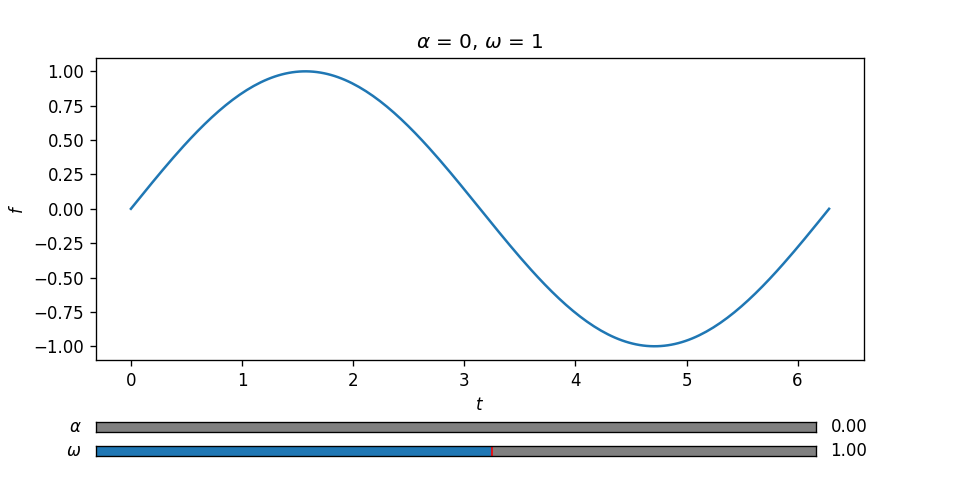

In [3]:
# Do a "Regular" plot
fig, ax = plt.subplots(1, 1)

α = 0
ω = 1
t = np.linspace(0, 2*np.pi, 200)
lines, = ax.plot(t, (t**α)*np.sin(ω*t))

ax.set_xlabel('$t$')
ax.set_ylabel('$f$')
_ = ax.set_title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω)) # Underscore supressed output here

Sliders take up some of the plot space, so here we adjust the figure to make room for the sliders and then add them to the plot.
After executing the next cell the sliders will appear in the figure above.
They will not yet do anything.

Each slider is associated to one of the variables alpha and omega and their default value and slider range specified.

In [4]:
# Adjust plot to make room and add sliders
fig.subplots_adjust(left=0.1, bottom=0.25)

axcolor = 'gray'

alpha_ax = plt.axes([0.1, 0.10, 0.75, 0.02], facecolor=axcolor)
omega_ax = plt.axes([0.1, 0.05, 0.75, 0.02], facecolor=axcolor)

alpha_slider = Slider(alpha_ax, r'$\alpha$', valmin=0, valmax=2, valinit=α, valstep=0.1)
omega_slider = Slider(omega_ax, r'$\omega$', valmin=-10, valmax=+10, valinit=ω, valstep=0.1)

Next we define an update function that changes the plot when the values of alpha and omega are changed.
We get the values of the slider from the slider objects we created and then change the title and line data to reflect the new values.

When the values are changed it may be necessary to change the data limits, done using `relim()` and update the view of the data using `autoscale_view()`.

After doing so we also need to tell matplotlib to re-draw the figure using `draw_idle()`.

In [5]:
# Define an update function for when values change
def update(val):
    α = alpha_slider.val
    ω = omega_slider.val
    ax.set_title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    lines.set_ydata((t**α)*np.sin(ω*t))
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

The update function can then be associated with the sliders, so that when the sliders are moved, the update function will be called.

At this stage calling `show()` in a script brings up the plot dialogue.
In the notebook, this adds the interactivity to the figure above.

In [6]:
# Set the update function for the sliders
alpha_slider.on_changed(update)
omega_slider.on_changed(update)

plt.show()